## Data Science from Scratch

#### Meeting: Jun 15, 2019 @ Cinco Ranch Library, Classroom on 2nd Floor

Reading through and working exercises from the Second Edition of Joel Grus' classic book, Data Science from Scratch: First Priciples from Python

### Chapter 6 - Probability

In [3]:
from typing import List

### Dependence and Independence

##### probability of Event A
P(A)

##### probability of Event B
P(B) 

##### probability of A & B, given independence
P(A,B) = P(A) P(B)

##### probability of A conditional on B
P(A|B) = P(A)P(B) / P(B)


In [16]:
import enum, random
class Kid(enum.Enum):
    BOY = 0
    GIRL = 1
    
def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(100000):
    younger = random_kid()
    older = random_kid()
    if older == Kid.GIRL:
        older_girl += 1
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1
        
print(both_girls/older_girl)
print(both_girls/either_girl)

    

0.49886036468330136
0.3327687383302214


In [18]:
#Continuous Distributions
def uniform_pdf(x: float) -> float:
    return 1 if 0 <= x < 1 else 0

In [19]:
def uniform_cdf(x: float) -> float:
    if x < 0:   return 0
    elif x < 1: return x
    else:       return 1

In [20]:
#Normal Distribution
import math
SQRT_TWO_PI = math.sqrt(2 * math.pi)

def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return ((math.exp(-(x - mu) ** 2 / 2 / sigma ** 2)) / (SQRT_TWO_PI * sigma))

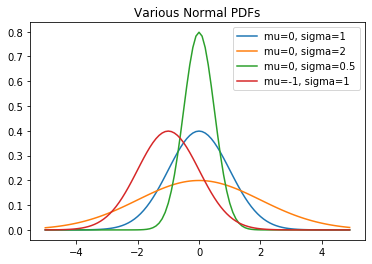

In [22]:
import matplotlib.pyplot as plt
xs = [x / 10.0 for x in range(-50,50)]
plt.plot(xs,[normal_pdf(x, sigma=1) for x in xs],'-', label='mu=0, sigma=1')
plt.plot(xs,[normal_pdf(x, sigma=2) for x in xs],'-', label='mu=0, sigma=2')
plt.plot(xs,[normal_pdf(x, sigma=0.5) for x in xs],'-', label='mu=0, sigma=0.5')
plt.plot(xs,[normal_pdf(x, mu=-1) for x in xs],'-', label='mu=-1, sigma=1')
plt.legend()
plt.title("Various Normal PDFs")
plt.show()

In [23]:
def normal_cdf(x: float, mu: float = 0, sigma = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

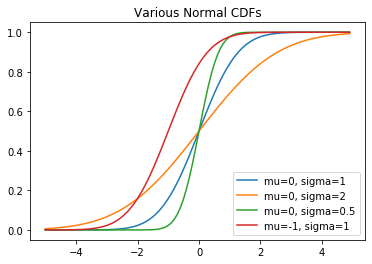

In [24]:
xs = [x / 10.0 for x in range(-50,50)]
plt.plot(xs,[normal_cdf(x, sigma=1) for x in xs],'-', label='mu=0, sigma=1')
plt.plot(xs,[normal_cdf(x, sigma=2) for x in xs],'-', label='mu=0, sigma=2')
plt.plot(xs,[normal_cdf(x, sigma=0.5) for x in xs],'-', label='mu=0, sigma=0.5')
plt.plot(xs,[normal_cdf(x, mu=-1) for x in xs],'-', label='mu=-1, sigma=1')
plt.legend(loc=4)
plt.title("Various Normal CDFs")
plt.show()

In [25]:
#find cdf value for given probability
def inverse_normal_cdf(p: float,
                      mu: float = 0,
                      sigma: float = 1,
                      tolerance: float = 0.00001) -> float:
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    low_z = -10.0
    high_z = 10.0
    while high_z - low_z > tolerance:
        mid_z = (low_z + high_z) / 2
        mid_p  = normal_cdf(mid_z)
        if mid_p < p:
            low_z = mid_z
        else: 
            high_z = mid_z
    return mid_z

In [32]:
print(normal_cdf(1))
# 0.841344746068543
print(inverse_normal_cdf(0.8413))

0.841344746068543
0.9998226165771484


In [34]:
print(normal_cdf(4))
# 0.9999683287581669
print(inverse_normal_cdf(0.99996832))

0.9999683287581669
3.999929428100586


In [35]:
#Central Limit Theorem
#Bernoulli

def bernoulli_trial(p: float) -> int:
    return 1 if random.random() < p else 0

def binomial(n: int, p: float) -> int:
    return sum (bernoulli_trial(p) for _ in range(n))

In [36]:
from collections import Counter

def binomial_histogram(p: float, n: int, num_points: int) -> None:
    data = [binomial(n, p) for _ in range(num_points)]
    
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p)) 
    
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs Normal Approximation")
    plt.show()

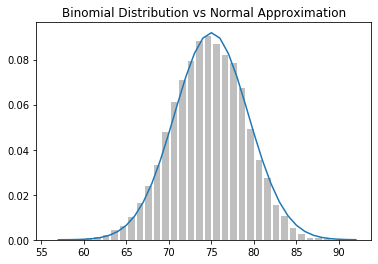

In [37]:
binomial_histogram(0.75, 100, 10000)

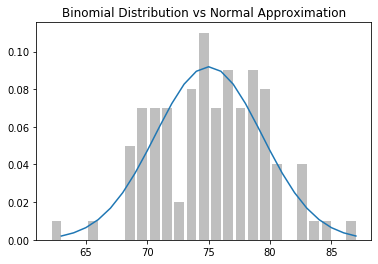

In [38]:
binomial_histogram(0.75, 100, 100)

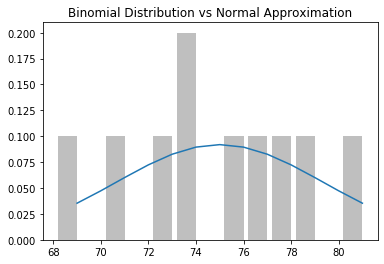

In [39]:
binomial_histogram(0.75, 100, 10)

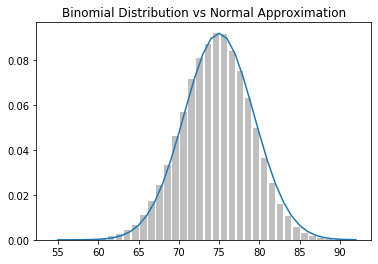

In [40]:
binomial_histogram(0.75, 100, 100000)